### Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importar dataset

In [2]:
df = pd.read_csv(r"C:\Users\Usuario\Downloads\car_evaluation.csv", header = None)

### Analisis Exploratorio

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Rename columns names:

In [5]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']

In [6]:
df.columns = col_names

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Frecuencia de distribución de valores posibles en las variables

In [9]:
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Declaramos las variables y la variable objetivos

In [13]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [14]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [15]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

Split data en el training y test set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
X_train.shape

(1157, 6)

In [18]:
X_test.shape

(571, 6)

In [19]:
y_train.shape

(1157,)

In [20]:
y_test.shape

(571,)

## Feature Engineering

In [21]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Enconde de variables categoricas

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [24]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [25]:
import category_encoders as ce

In [26]:
# Ordinal Encoding

encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety'])

In [27]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test) 

In [28]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [29]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


Arboles de Decision con criterion Gini Index

 DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples:

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
arbol_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state = 0)

In [32]:
arbol_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Predict Test set

After being fitted, the model can then be used to predict the class of samples:

In [33]:
y_pred_gini = arbol_gini.predict(X_test)

In [34]:
y_test

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
        ...  
1034    unacc
341       acc
147     unacc
360     unacc
83      unacc
Name: class, Length: 571, dtype: object

Checar accuracy score con critrio Gini index

In [35]:
from sklearn.metrics import accuracy_score #Accuracy classification score.

In [39]:
print("Model accuraccy with criterion Gini Index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))#default=”gini”

Model accuraccy with criterion Gini Index: 0.8021


Comparar el test-set con el train-set accuracy para checar el overfitting

In [40]:
y_pred_train_gini = arbol_gini.predict(X_train)

In [41]:
print("Model accuraccy with criterion Gini Index: {0:0.4f}".format(accuracy_score(y_train, y_pred_train_gini)))

Model accuraccy with criterion Gini Index: 0.7865


Visualizacion del Arbol

[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

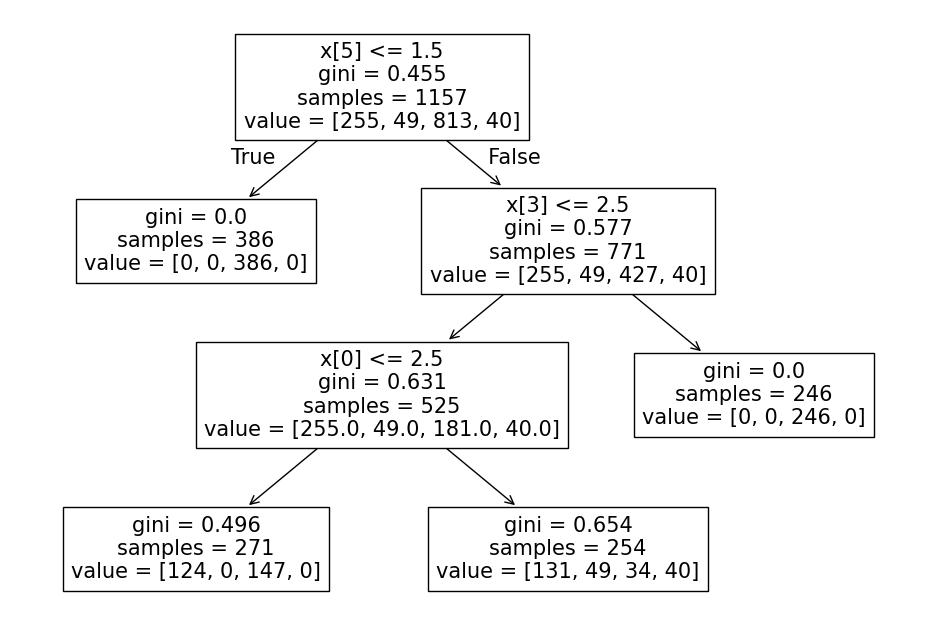

In [42]:
plt.figure(figsize = (12,8))

from sklearn import tree

tree.plot_tree(arbol_gini.fit(X_train, y_train))

Criterion Entropy

“log_loss” and “entropy” both for the Shannon information gain

Gini:
$$H(Q_M)=\sum_{k} p_{mk} (1-p_mk)$$

Log loss/Entropy:
$$H(Q_M)=-\sum_{k} p_{mk}log(p_mk)$$

In [44]:
entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

In [45]:
entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
y_pred_entropy = entropy.predict(X_test)

In [47]:
print('Accuracy del modelo con criterion entropy: {0:0.4f}'.format(accuracy_score(y_test,y_pred_entropy)))

Accuracy del modelo con criterion entropy: 0.8021


In [48]:
y_pred_train_entropy = entropy.predict(X_train)

In [49]:
print('Accuracy del modelo con criterion entropy: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_entropy)))

Accuracy del modelo con criterion entropy: 0.7865


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

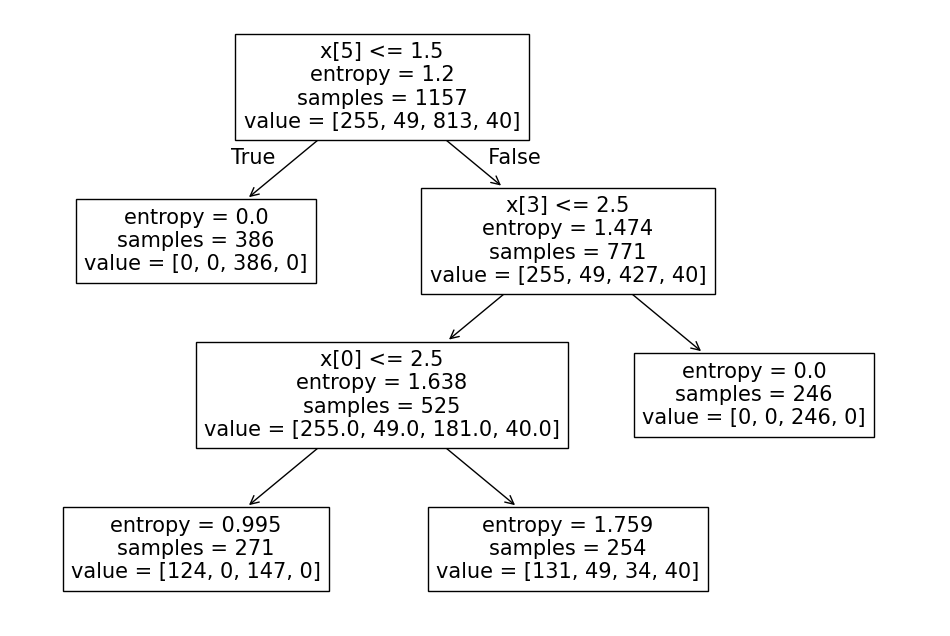

In [50]:
plt.figure(figsize = (12,8))

tree.plot_tree(entropy.fit(X_train,y_train))

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_entropy))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571

